In [17]:
%pip install -q opencv-python  # Install the OpenCV library since it's not found

# Import Libraries
import cv2
from matplotlib import pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'cv2'

In [13]:
# write a code to convert an image from BGR to RGB format
image_bgr = cv2.imread('baboon.png')  # Load the image
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.imshow(image_rgb)  # Display the image
plt.axis('off')  # Hide axis
plt.show()  # Show the image

NameError: name 'cv2' is not defined

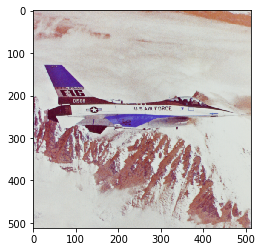

In [2]:
# Import image and display
img=cv2.imread('airplane.png',1)
plt.imshow(img)

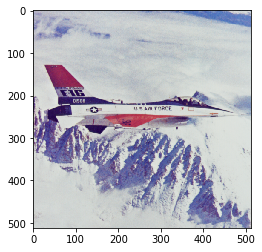

In [3]:
# color models
#BGR 2 RGB
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

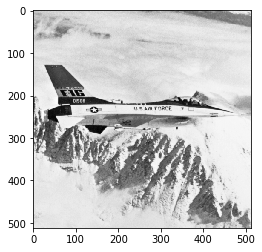

In [4]:
#BGR 2 GRAY
img_gry=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gry,'gray')

In [5]:
img.shape

(512, 512, 3)

In [6]:
img_rgb.shape

(512, 512, 3)

In [7]:
img_gry.shape

(512, 512)

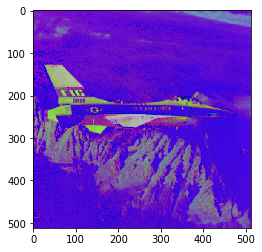

In [8]:
#BGR 2 HSV
img_hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)

In [9]:
img_hsv[:,:,2]

array([[181, 206, 207, ..., 206, 202, 196],
       [141, 204, 200, ..., 204, 195, 197],
       [141, 203, 199, ..., 209, 196, 193],
       ...,
       [172, 215, 214, ..., 191, 190, 168],
       [173, 216, 215, ..., 177, 190, 184],
       [127, 123, 125, ..., 127, 125, 117]], dtype=uint8)

Text(0.5, 1.0, 'processed')

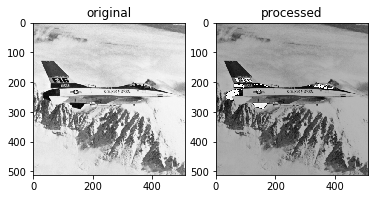

In [10]:
#Point Operations
# Gray Level
# Brightness Modification
img_g1=img_gry-40
plt.subplot(1,2,1);plt.imshow(img_gry,cmap='gray');plt.title('original')
plt.subplot(1,2,2);plt.imshow(img_g1,cmap='gray');plt.title('processed')

Text(0.5, 1.0, 'processed')

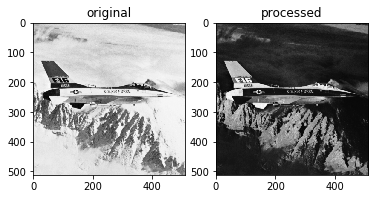

In [11]:
# Image Negative
img_g2=255-img_gry
plt.subplot(1,2,1);plt.imshow(img_gry,cmap='gray');plt.title('original')
plt.subplot(1,2,2);plt.imshow(img_g2,cmap='gray');plt.title('processed')

Text(0.5, 1.0, 'processed')

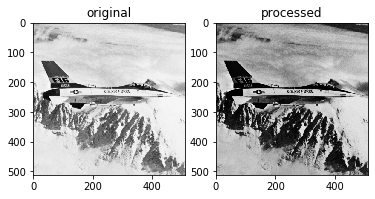

In [12]:
#Gamma Correction
gamma=3.1
m,n=img_gry.shape
img_g3=np.zeros([m,n])
for i in range(m):
    for j in range(n):
        img_g3[i,j]=img_gry[i,j]**gamma

plt.subplot(1,2,1);plt.imshow(img_gry,cmap='gray');plt.title('original')
plt.subplot(1,2,2);plt.imshow(img_g3,cmap='gray');plt.title('processed')

Text(0.5, 1.0, 'processed')

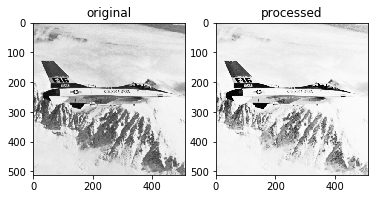

In [13]:
# Contrast Stretching
img_cp= img_gry.copy()
xp = [0, 50, 128, 192, 255]
fp = [0, 25, 200, 225, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')
img_ct = cv2.LUT(img_cp, table)
plt.subplot(1,2,1);plt.imshow(img_cp,cmap='gray');plt.title('original')
plt.subplot(1,2,2);plt.imshow(img_ct,cmap='gray');plt.title('processed')

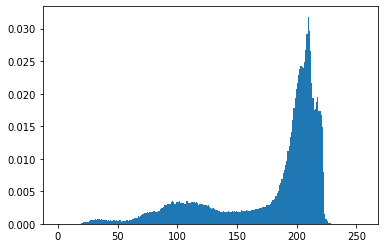

In [22]:
# Histogram Plots
plt.hist(img_gry.ravel(),256,[0,255],density=1)
plt.show()

In [24]:
# Histogram Equalization
I = img_gry


#size of the input image.
r,c = I.shape 

#uint 8 blamk canvas
img_eq = np.zeros([r,c]);

#number of pixels.
n = r*c;

#frequency pdf and cdf and some variables
f = np.zeros([256,1]);
pdf = np.zeros([256,1]);
cdf = np.zeros([256,1]);
out = np.zeros([256,1]);
cum = np.zeros([256,1]);


#Nested for loop

for i in range(r):
    for j in range(c):
        value = I[i,j];
        f[value] = f[value]+1;
        pdf[value] = f[value]/n;


<StemContainer object of 3 artists>

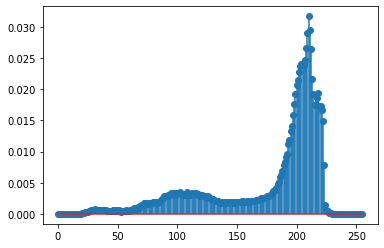

In [25]:
plt.stem(pdf,use_line_collection=True)

Text(0.5, 1.0, 'Hist Eq')

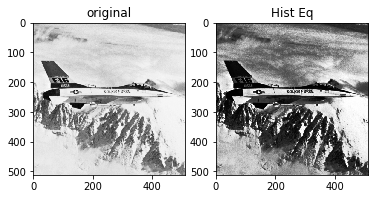

In [26]:
#finding cdf
sum = 0;
L = 255;

for i in range(pdf.shape[0]):
    sum = sum + f[i];
    cum[i] = sum;
    cdf[i] = (cum[i]+1)/n;
    out[i] = np.round(cdf[i]*L);


for i in range(r):
    for j in range(c):
        img_eq[i,j] = out[I[i,j]];

plt.subplot(1,2,1);plt.imshow(I,"gray");plt.title("original")
plt.subplot(1,2,2);plt.imshow(img_eq,"gray");plt.title("Hist Eq")